In [3]:
# import lib
import numpy as np
from scipy import stats
from collections import Counter
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sklearn.discriminant_analysis as da
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import random
from datetime import datetime
%matplotlib inline

In [4]:
calendar_df = pd.read_csv('calendar.csv', usecols=range(0,4), index_col=False)

In [5]:
print 'The number ids listed in calendar.csv is', len(set(calendar_df.listing_id))
print 'The number of dates included is ', len(set(calendar_df.date))

The number ids listed in calendar.csv is 27392
The number of dates included is  367


In [7]:
# delete all the null value rows
print 'The total number of rows is', len(calendar_df)
df_modified = calendar_df.dropna()
print 'The toal number of rows with known prices is', len(df_modified)
# we will revisit this at a later date and fill in missing values with the modal price for that id

The total number of rows is 9998080
The toal number of rows with known prices is 7201883


In [5]:
# convert price to floats 
prices_tmp = df_modified.price.values
prices = []
for i in prices_tmp:
    prices.append(float(i[1:]))

In [6]:
df_modified2 = df_modified.drop(['price'], axis = 1)
df_modified2['price'] = prices
df_modified2.head()

,listing_id,date,available,price
0,3604481,2015-01-01,t,600.0
1,3604481,2015-01-02,t,600.0
2,3604481,2015-01-03,t,600.0
3,3604481,2015-01-04,t,600.0
4,3604481,2015-01-05,t,600.0


In [7]:
# sample 3000 ids to find the popular dates 
sample_id = np.random.choice(df_modified2['listing_id'].values, 3000)

pricy_dates = {}
for i in sample_id:
    tmp_df = df_modified2[df_modified2.listing_id == i]
    index = tmp_df.price.values.argsort()[-10:][::-1]
    #print tmp_df.date.values[index[0]]
    ds = []
    for j in index:
        ds.append(tmp_df.date.values[j])
    for d in ds:
        if d in pricy_dates:
            pricy_dates[d] += 1
        else:
            pricy_dates[d] = 1

In [8]:
# process pricy dates, get 20 most popular 
scores = Counter(pricy_dates)
scores.most_common(20)
most_common = scores.most_common(20)
most_common

[('2016-01-01', 1565),
 ('2015-05-03', 1017),
 ('2015-05-02', 1009),
 ('2015-05-04', 1008),
 ('2015-05-01', 972),
 ('2015-04-30', 919),
 ('2016-01-02', 887),
 ('2015-04-29', 840),
 ('2015-04-28', 782),
 ('2015-05-05', 688),
 ('2015-04-27', 432),
 ('2015-05-06', 411),
 ('2015-05-07', 361),
 ('2015-07-24', 341),
 ('2015-04-25', 338),
 ('2015-07-25', 336),
 ('2015-04-26', 331),
 ('2015-07-18', 328),
 ('2015-05-22', 323),
 ('2015-07-17', 315)]

In [9]:
# based on the sample, calculate how much a holiday boosts price
def get_price_increase(date):
    price_increase = []
    for i in sample_id:
        tmp_df = df_modified2[df_modified2.listing_id == i]
        mode = stats.mode(tmp_df.price.values)
        p = tmp_df[tmp_df['date'] == date].price.values
        if p:
            increase = (float(p) - float(mode[0]))
            price_increase.append(increase)
        
    return np.mean(price_increase), price_increase
mean_0101, pi_0101  = get_price_increase('2015-01-31')

In [ ]:
# create a 366 day table for (2015-01-01 -> 2016-01-01)
loolup_table = []
dates = []
# 2015-01-01 to 2015-01-31
for i in range(1,32):
    if i < 10:
        dates.append('2015-01-0' + str(i))
    else:
        dates.append('2015-01-' + str(i))
# feb
for i in range(1,29):
    if i < 10:
        dates.append('2015-02-0' + str(i))
    else:
        dates.append('2015-02-' + str(i))
for i in range(1,32):
    if i < 10:
        dates.append('2015-03-0' + str(i))
    else:
        dates.append('2015-03-' + str(i))
for i in range(1,31):
    if i < 10:
        dates.append('2015-04-0' + str(i))
    else:
        dates.append('2015-04-' + str(i))
for i in range(1,32):
    if i < 10:
        dates.append('2015-05-0' + str(i))
    else:
        dates.append('2015-05-' + str(i))
for i in range(1,31):
    if i < 10:
        dates.append('2015-06-0' + str(i))
    else:
        dates.append('2015-06-' + str(i))
for i in range(1,32):
    if i < 10:
        dates.append('2015-07-0' + str(i))
    else:
        dates.append('2015-07-' + str(i))
for i in range(1,32):
    if i < 10:
        dates.append('2015-08-0' + str(i))
    else:
        dates.append('2015-08-' + str(i))
for i in range(1,31):
    if i < 10:
        dates.append('2015-09-0' + str(i))
    else:
        dates.append('2015-09-' + str(i))
for i in range(1,32):
    if i < 10:
        dates.append('2015-10-0' + str(i))
    else:
        dates.append('2015-10-' + str(i))
for i in range(1,31):
    if i < 10:
        dates.append('2015-11-0' + str(i))
    else:
        dates.append('2015-11-' + str(i))
for i in range(1,32):
    if i < 10:
        dates.append('2015-12-0' + str(i))
    else:
        dates.append('2015-12-' + str(i))
dates.append('2016-01-01')

In [16]:
# find the price deviation for all dates
for date in dates:
    mean, _ = get_price_increase(date)
    loolup_table.append(mean)

In [43]:
save = np.array(lookup_table)
np.savetxt('test.out', save, delimiter=',') 

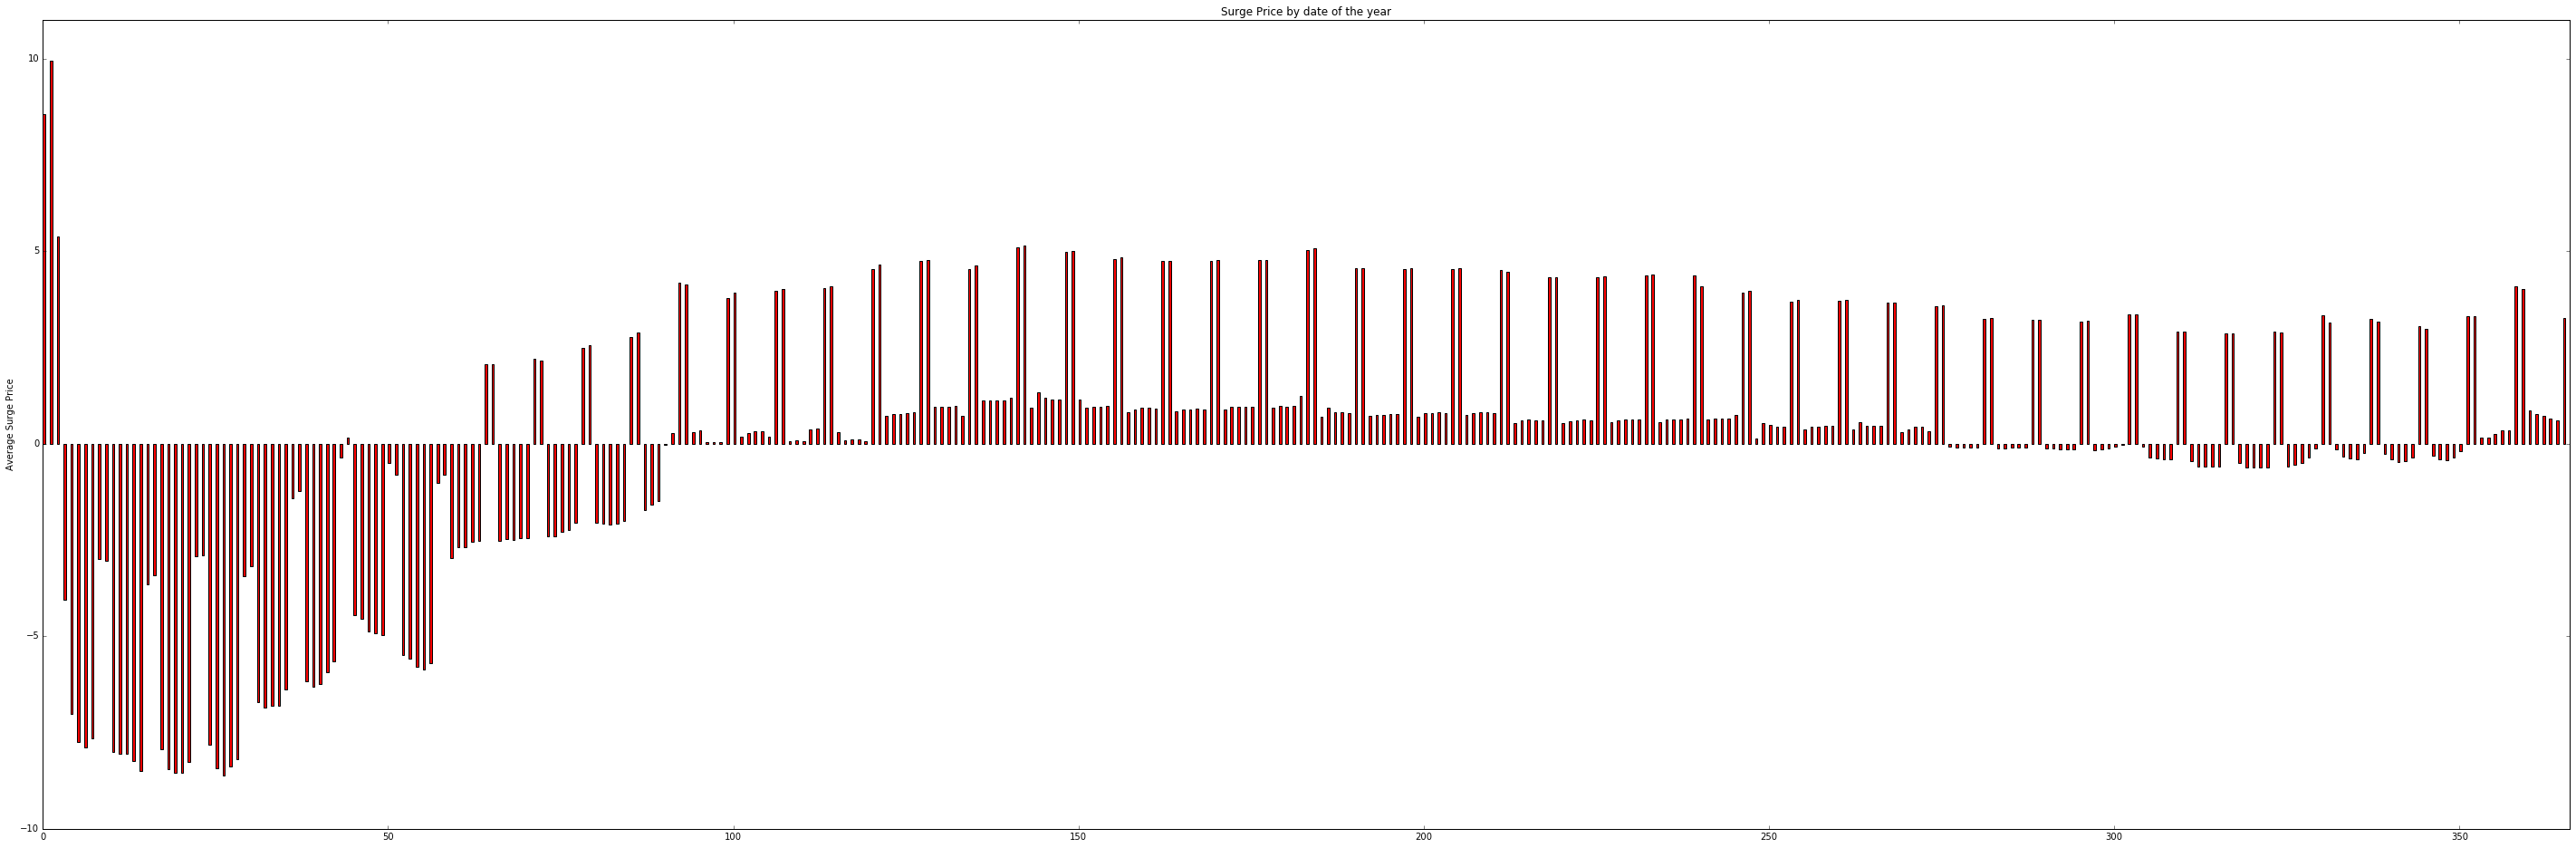

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(50,16))
ind = np.arange(366)  
width = 0.35       # the width of the bars
p = ax.bar(ind, lookup_table, width, color='red')
ax.set_ylabel('Average Surge Price')
ax.set_title('Surge Price by date of the year')
ax.set_xlim([0, 366])
ax.set_ylim([-10, 11])
plt.show()

This figure shows how price fluctuates over the whole year. Some interesting observations are:
    - Holidays such as New Year's Eve, New Year's Day, Cinco de Mayo, and Fourth of July do induce surge pricing. 
    - More frequently, weekends causes surge pricing for about $5. 
    - Winter and early spring are the off-season of New York City tourism. Prices during these cold months are much lower than the rest of the year. 
    - Late spring to early autumn prices are higher. 
In short, Airbnb listing prices fluctuate with holidays, weekends, and seasons.